# Analysis of serotypes over the years 

Analysing the cases detected and ocurrence of serotypes over the years, on a country-wide scale. 

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sys

In [2]:
sys.path.append('..')

## Import serotype data

In [3]:
file_s = '../Data/dengue_BR_serotypes.csv'
s_data = pd.read_csv(file_s, delimiter = ';')

In [15]:
s_data_grouped = s_data.groupby(['YEAR','SOROTIPO'])['NUMBER'].sum()
s_data_grouped = s_data_grouped.to_frame(name = 'CASES').reset_index()

## Serotype tests over the years 

In [66]:
# number of tests
s_data_sum = s_data_grouped.copy()
filt_sum = (s_data_sum['SOROTIPO'] != ' ')
s_data_sum = s_data_sum[filt_sum]
s_data_sum = s_data_sum.groupby(['YEAR'])['CASES'].sum()
s_data_sum = s_data_sum.to_frame(name = 'CASES').reset_index()
# number of cases
s_data_total = s_data_grouped.copy()
s_data_total = s_data_total.groupby(['YEAR'])['CASES'].sum()
s_data_total = s_data_total.to_frame(name = 'CASES').reset_index()

### Total tests for serotypes over the years

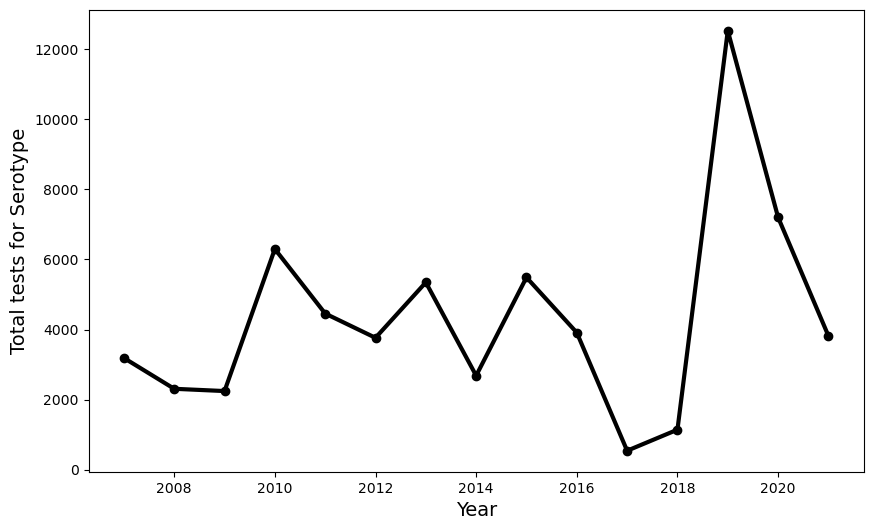

In [80]:
fig = plt.figure(figsize = (10,6))
plt.plot(s_data_sum['YEAR'],s_data_sum['CASES'], '-o',linewidth = 3, color = 'k')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Total tests for Serotype', fontsize = 14)
plt.show()

### Number of tests for serotypes relative to total cases

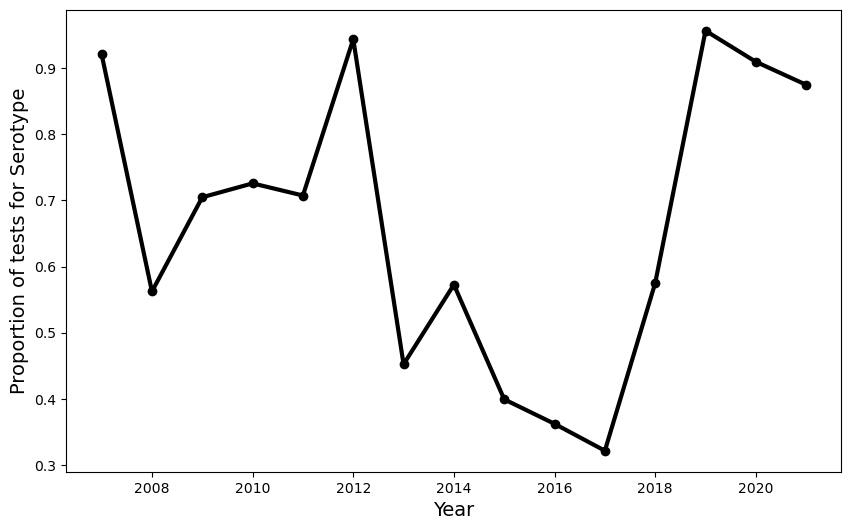

In [88]:
fig = plt.figure(figsize = (10,6))
plt.plot(s_data_sum['YEAR'],100*s_data_sum['CASES']/s_data_total['CASES'], '-o',  linewidth = 3, color = 'k')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Proportion of tests for Serotype', fontsize = 14)
plt.show()

## Serotypes over the years

In [56]:
# tests for serotype for each serotype
s_data_ser = s_data_grouped.copy()
filt_ser = (s_data_ser['SOROTIPO'] != ' ')
s_data_ser = s_data_ser[filt_ser]

### Tests positive for each serotype over the years

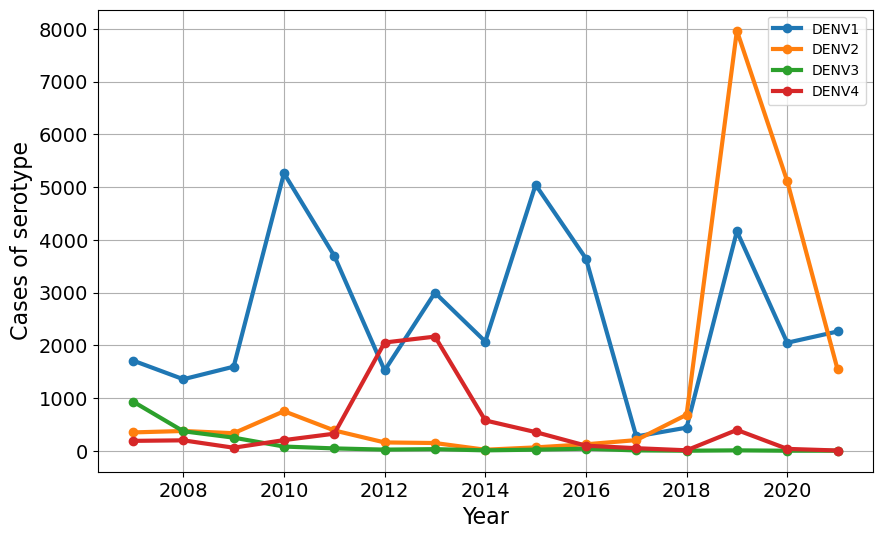

In [132]:
fig = plt.figure(figsize = (10,6))
plt.plot(s_data_ser['YEAR'].unique(),s_data_ser[s_data_ser['SOROTIPO']=='1']['CASES'], '-o', label = 'DENV1', linewidth = 3)
plt.plot(s_data_ser['YEAR'].unique(),s_data_ser[s_data_ser['SOROTIPO']=='2']['CASES'], '-o', label = 'DENV2', linewidth = 3)
plt.plot(s_data_ser['YEAR'].unique(),s_data_ser[s_data_ser['SOROTIPO']=='3']['CASES'], '-o', label = 'DENV3', linewidth = 3)
plt.plot(s_data_ser['YEAR'].unique(),s_data_ser[s_data_ser['SOROTIPO']=='4']['CASES'], '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Cases of serotype',fontsize = 16)
plt.legend()
plt.show()

### Proportion of test positive for each serotype over the years

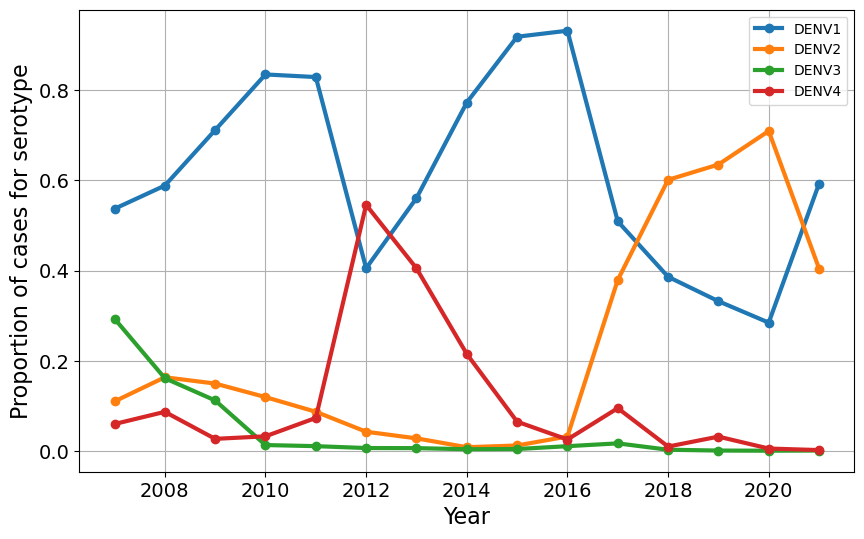

In [133]:
fig = plt.figure(figsize = (10,6))
plt.plot(s_data_ser['YEAR'].unique(),np.array(s_data_ser[s_data_ser['SOROTIPO']=='1']['CASES'])/np.array(s_data_sum['CASES']), '-o', label = 'DENV1', linewidth = 3)
plt.plot(s_data_ser['YEAR'].unique(),np.array(s_data_ser[s_data_ser['SOROTIPO']=='2']['CASES'])/np.array(s_data_sum['CASES']), '-o', label = 'DENV2', linewidth = 3)
plt.plot(s_data_ser['YEAR'].unique(),np.array(s_data_ser[s_data_ser['SOROTIPO']=='3']['CASES'])/np.array(s_data_sum['CASES']), '-o', label = 'DENV3', linewidth = 3)
plt.plot(s_data_ser['YEAR'].unique(),np.array(s_data_ser[s_data_ser['SOROTIPO']=='4']['CASES'])/np.array(s_data_sum['CASES']), '-o', label = 'DENV4', linewidth = 3)
plt.grid()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Proportion of cases for serotype',fontsize = 16)
plt.legend()
plt.show()